<a href="https://colab.research.google.com/github/RajkumarGalaxy/ML-Tabular-Data/blob/master/Evaluation_Metrics_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [31]:
# choose a binary classification problem
data = load_breast_cancer()
# develop predictors X and target y dataframes
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])
y = abs(y-1)
# split data into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

# build a RF model with default parameters
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

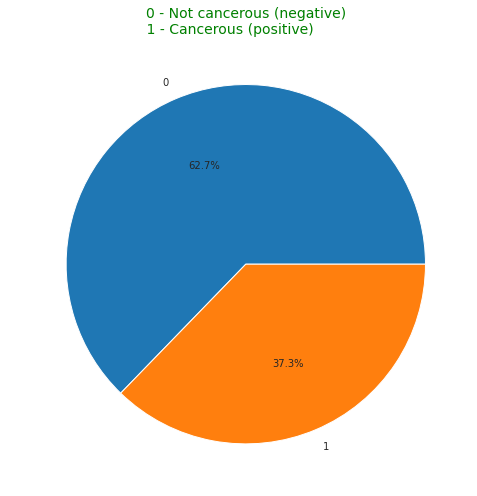

In [45]:
plt.figure(figsize=(7,7))
y.value_counts().plot.pie(ylabel=' ', autopct = '%0.1f%%')
plt.title(f'0 - Not cancerous (negative)\n 1 - Cancerous (positive)        ', size=14, c='green')
plt.tight_layout(); plt.show()

## Confusion Matrix

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, preds)
print(confusion_matrix)

[[72  0]
 [ 5 37]]


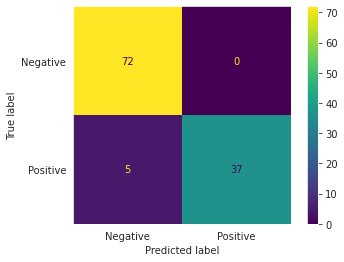

In [55]:
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])
plt.show()

In [56]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([72,  0,  5, 37])

## Precision

In [58]:
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=0)
precision_positive, precision_negative

(1.0, 0.935064935064935)

## Accuracy

In [61]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.956140350877193

## Recall

In [62]:
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=0)
recall_sensitivity, recall_specificity

(0.8809523809523809, 1.0)

## F1 score

In [63]:
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=0)
f1_positive, f1_negative

(0.9367088607594937, 0.9664429530201343)

In [64]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



## ROC AUC Score

In [68]:
prob_train.shape

(1, 455)

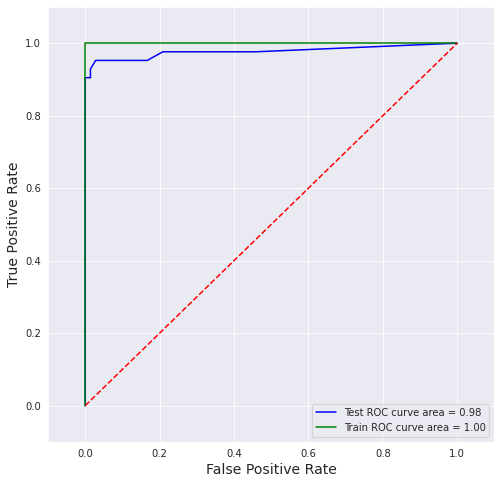

In [74]:
sns.set_style('darkgrid')
preds_train = model.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(model.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(model.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

Fine tuning threshold value

In [81]:
# creating index
i = np.arange(len(tpr1))
# extracting roc values against different thresholds 
roc = pd.DataFrame({'fpr':fpr1, 'tpr':tpr1, 'tf':(tpr1-1+fpr1), 'thresholds':thresholds1}, index=i)
# top 5 best roc occurrences 
roc.iloc[(roc.tf-0).abs().argsort()[:5]]

,fpr,tpr,tf,thresholds
16,0.027778,0.952381,-0.019841,0.28
17,0.083333,0.952381,0.035714,0.17
15,0.013889,0.928571,-0.057540,0.34
18,0.111111,0.952381,0.063492,0.16
14,0.013889,0.904762,-0.081349,0.41


## Hamming Loss

In [77]:
hamming_loss = metrics.hamming_loss(y_test, preds)
hamming_loss

0.043859649122807015

## Jaccard score

In [83]:
jaccard = metrics.jaccard_score(y_test, preds)
jaccard

0.8809523809523809

## Entropy loss

In [87]:
# Entropy loss
cross_entropy_loss = metrics.log_loss(y_test, prob_test)
cross_entropy_loss

0.4163112449732295

## Precision Recall curve

In [99]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test)

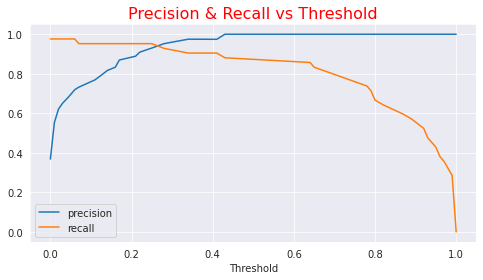

In [107]:
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

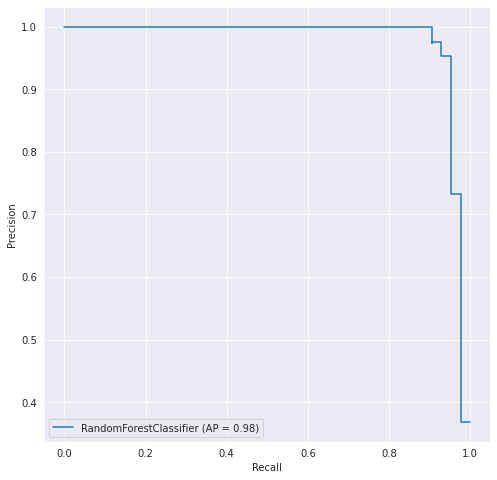

In [97]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(model, X_test, y_test, ax=ax)